# Tarefa 01

- Leia os enunciados com atenção
- Saiba que pode haver mais de uma resposta correta
- Insira novas células de código sempre que achar necessário
- Em caso de dúvidas, procure os monitores
- Divirta-se :)

In [2]:
from pandas_datareader import data as pdr

import plotly.express as px
from plotly import graph_objects

import pandas as pd
import numpy as np

import yfinance as yfin
from datetime import datetime
yfin.pdr_override()

#### 1. Baixando dados de ativos
    1. Baixe os dados de três ativos da sua escolha do Yahoo Finance, correspondente a um período de pelo menos 2 anos até a data mais recente.
    2. Salve esses dados para que você possa utilizá-los na próxima tarefa.

In [5]:
ativos = ['DIS.SN', 'AAPL', 'AMZN']
dt_ini = datetime(2019,1,1)

yf = pdr.get_data_yahoo(ativos, start=dt_ini)
yf.head()

[*********************100%***********************]  3 of 3 completed


Adj Close                             Close             \
                 AAPL       AMZN      DIS.SN       AAPL       AMZN   
Date                                                                 
2019-01-02  38.047047  76.956497  111.071373  39.480000  76.956497   
2019-01-03  34.257282  75.014000  111.071373  35.547501  75.014000   
2019-01-04  35.719700  78.769501  111.071373  37.064999  78.769501   
2019-01-07  35.640194  81.475502  111.071373  36.982498  81.475502   
2019-01-08  36.319614  82.829002  110.152451  37.687500  82.829002   

                             High                               Low  \
                DIS.SN       AAPL       AMZN      DIS.SN       AAPL   
Date                                                                  
2019-01-02  112.410004  39.712502  77.667999  112.410004  38.557499   
2019-01-03  112.410004  36.430000  76.900002  112.410004  35.500000   
2019-01-04  112.410004  37.137501  79.699997  112.410004  35.950001   
2019-01-07  112.410004  37.207500  81.727997  112.410004  36.474998   
2019-01-08  111.480003  37.955002  83.830498  111.480003  37.130001   

                                        Open                         \
                 AMZN      DIS.SN       AAPL       AMZN      DIS.SN   
Date                                                                  
2019-01-02  73.046501  112.410004  38.722500  73.260002  112.410004   
2019-01-03  74.855499  112.410004  35.994999  76.000504  112.410004   
2019-01-04  75.915497  112.410004  36.132500  76.500000  112.410004   
2019-01-07  79.459503  112.410004  37.174999  80.115501  112.410004   
2019-01-08  80.830498  111.480003  37.389999  83.234497  111.480003   

                 Volume                      
                   AAPL         AMZN DIS.SN  
Date                                         
2019-01-02  148158800.0  159662000.0    0.0  
2019-01-03  365248800.0  139512000.0    0.0  
2019-01-04  234428400.0  183652000.0    0.0  
2019-01-07  219111200.0  159864000.0    0.0  
2019-01-08  164101200.0  177628000.0   55.0

In [25]:
#salvando no formato parquet
yf.to_parquet('data/stock.zip')

#### 2. Observando a volatilidade dentro do dia
1. Calcule a amplitude de variação do valor do ativo dentro do dia. Essa amplitude você pode calcular com um comando simples de adicionar uma coluna no Pandas: (valor máximo - valor mínimo).
2. Monte um gráfico de linha mostrando a variação dessa amplitude ao longo do período coletado, por ativo.
3. Veja se consegue identificar que ativo apresentou maior volatilidade.

In [26]:
stock_raw = pd.read_parquet('data/stock.zip')
stock_raw.head()

Adj Close                             Close             \
                 AAPL       AMZN      DIS.SN       AAPL       AMZN   
Date                                                                 
2019-01-02  38.047047  76.956497  111.071373  39.480000  76.956497   
2019-01-03  34.257282  75.014000  111.071373  35.547501  75.014000   
2019-01-04  35.719700  78.769501  111.071373  37.064999  78.769501   
2019-01-07  35.640194  81.475502  111.071373  36.982498  81.475502   
2019-01-08  36.319614  82.829002  110.152451  37.687500  82.829002   

                             High                               Low  \
                DIS.SN       AAPL       AMZN      DIS.SN       AAPL   
Date                                                                  
2019-01-02  112.410004  39.712502  77.667999  112.410004  38.557499   
2019-01-03  112.410004  36.430000  76.900002  112.410004  35.500000   
2019-01-04  112.410004  37.137501  79.699997  112.410004  35.950001   
2019-01-07  112.410004  37.207500  81.727997  112.410004  36.474998   
2019-01-08  111.480003  37.955002  83.830498  111.480003  37.130001   

                                        Open                         \
                 AMZN      DIS.SN       AAPL       AMZN      DIS.SN   
Date                                                                  
2019-01-02  73.046501  112.410004  38.722500  73.260002  112.410004   
2019-01-03  74.855499  112.410004  35.994999  76.000504  112.410004   
2019-01-04  75.915497  112.410004  36.132500  76.500000  112.410004   
2019-01-07  79.459503  112.410004  37.174999  80.115501  112.410004   
2019-01-08  80.830498  111.480003  37.389999  83.234497  111.480003   

                 Volume                      
                   AAPL         AMZN DIS.SN  
Date                                         
2019-01-02  148158800.0  159662000.0    0.0  
2019-01-03  365248800.0  139512000.0    0.0  
2019-01-04  234428400.0  183652000.0    0.0  
2019-01-07  219111200.0  159864000.0    0.0  
2019-01-08  164101200.0  177628000.0   55.0

In [27]:
#calculando amplitude de variação do valor da ação diariamente
stock = stock_raw[['High', 'Low']].stack().reset_index()
stock.columns = ['date', 'stock', 'high', 'low']
stock['range'] = stock['high'] - stock['low']
stock.head()

,date,stock,high,low,range
0,2019-01-02,AAPL,39.712502,38.557499,1.155003
1,2019-01-02,AMZN,77.667999,73.046501,4.621498
2,2019-01-02,DIS.SN,112.410004,112.410004,0.000000
3,2019-01-03,AAPL,36.430000,35.500000,0.930000
4,2019-01-03,AMZN,76.900002,74.855499,2.044502


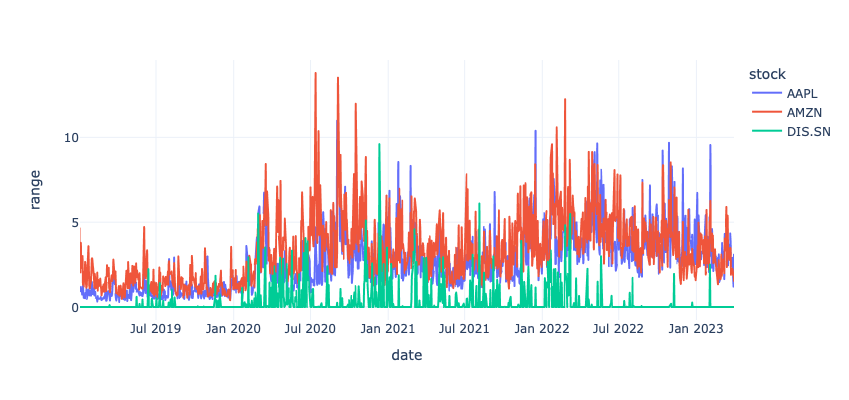

In [28]:
#Gráfico amplitude
px.line(stock, x="date", y="range", color='stock', template='plotly_white', height=400)